In [1]:
# Import required modules
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from pathlib import Path
import pandas as pd
import seaborn as sns

In [5]:
def normalise_data_by_month(data: pd.Series) -> pd.DataFrame:
    out = []
    for season in np.unique(data.index.month.values):
        mean = data.loc[data.index.month == season].mean()
        std = data.loc[data.index.month == season].std()
        value = (data.loc[data.index.month == season] - mean) / std

        out.append(value)
    return pd.concat(out)

In [9]:
data_dir = Path('/Users/tommylees/github/hydro-mini-hack')
csv_file = data_dir / 'flow_and_indices.csv'
df = pd.read_csv(csv_file)
df.date = pd.to_datetime(df.date)
df = df.set_index('date')
df.head()

,flow,flow_std,AMM,AMO,AO,NAO,NINO12,NINO3,NINO34,NOI,NP,NPI,ONI,PDO,PNA,PWP,SOI,TNA,TPI,TSA
date,,,,,,,,,,,,,,,,,,,,
1950-01-01,36.854839,7.938759,0.53,0.112,-0.060,0.56,23.01,23.56,24.55,2.644,1014.87,1014.87,-1.53,-2.13,-3.65,-0.382,NaN,-0.14,-1.12,0.08
1950-02-01,203.896429,59.782851,-1.07,-0.032,0.627,0.01,24.32,24.89,25.06,2.077,1010.40,1010.40,-1.34,-2.91,-1.69,-0.207,NaN,-0.36,-1.38,0.15
1950-03-01,73.916129,14.940506,-1.26,-0.104,-0.008,-0.78,25.11,26.36,25.87,3.091,1008.13,1008.13,-1.16,-1.13,-0.06,-0.110,NaN,-0.37,-1.09,0.12
1950-04-01,46.833333,20.282306,0.72,-0.129,0.555,0.65,23.63,26.44,26.28,1.923,1015.49,1015.49,-1.18,-1.20,-0.23,-0.126,NaN,-0.11,-1.10,-0.17
1950-05-01,39.703226,18.872652,1.05,-0.057,0.072,-0.50,22.68,25.69,26.18,2.211,1015.47,1015.47,-1.07,-2.23,-0.40,-0.145,NaN,-0.25,-1.28,-0.34


In [11]:
df['flow_norm'] = normalise_data_by_month(df.flow)
df.head()

,flow,flow_std,AMM,AMO,AO,NAO,NINO12,NINO3,NINO34,NOI,...,NPI,ONI,PDO,PNA,PWP,SOI,TNA,TPI,TSA,flow_norm
date,,,,,,,,,,,,,,,,,,,,,
1950-01-01,36.854839,7.938759,0.53,0.112,-0.060,0.56,23.01,23.56,24.55,2.644,...,1014.87,-1.53,-2.13,-3.65,-0.382,NaN,-0.14,-1.12,0.08,-1.312739
1950-02-01,203.896429,59.782851,-1.07,-0.032,0.627,0.01,24.32,24.89,25.06,2.077,...,1010.40,-1.34,-2.91,-1.69,-0.207,NaN,-0.36,-1.38,0.15,1.181776
1950-03-01,73.916129,14.940506,-1.26,-0.104,-0.008,-0.78,25.11,26.36,25.87,3.091,...,1008.13,-1.16,-1.13,-0.06,-0.110,NaN,-0.37,-1.09,0.12,-0.454067
1950-04-01,46.833333,20.282306,0.72,-0.129,0.555,0.65,23.63,26.44,26.28,1.923,...,1015.49,-1.18,-1.20,-0.23,-0.126,NaN,-0.11,-1.10,-0.17,-0.653773
1950-05-01,39.703226,18.872652,1.05,-0.057,0.072,-0.50,22.68,25.69,26.18,2.211,...,1015.47,-1.07,-2.23,-0.40,-0.145,NaN,-0.25,-1.28,-0.34,-0.384741


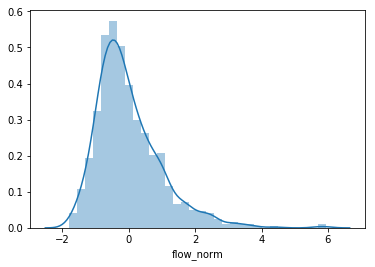

In [14]:
sns.distplot(df.flow_norm)

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [34]:
r = RandomForestRegressor(
    n_estimators='warn',
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
)


In [35]:
df.columns

Index(['flow', 'flow_std', 'AMM', 'AMO', 'AO', 'NAO', 'NINO12', 'NINO3',
       'NINO34', 'NOI', 'NP', 'NPI', 'ONI', 'PDO', 'PNA', 'PWP', 'SOI', 'TNA',
       'TPI', 'TSA', 'flow_norm'],
      dtype='object')

1.3603743577265024


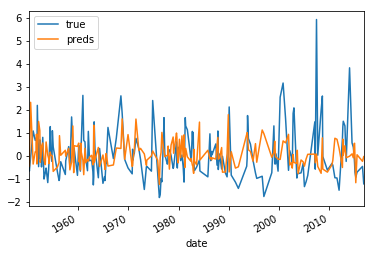

In [48]:
X = df[['AMO', 'AO', 'NINO34', 'PDO']]
y = df['flow_norm']
train_X, test_X, train_y, test_y = train_test_split(X, y)

r.fit(train_X, train_y)
preds = r.predict(test_X)
print(mean_squared_error(test_y, preds))

out = pd.DataFrame({'true':test_y,'preds':preds})
out.plot()

In [52]:
for feature in zip(['AMO', 'AO', 'NINO34', 'PDO'], r.feature_importances_):
    print(feature)

('AMO', 0.25339105810619095)
('AO', 0.26394820507553735)
('NINO34', 0.2555031489433623)
('PDO', 0.22715758787490933)


In [57]:
?r.score #(test_X, test_y)

Object `r.score #(test_X, test_y)` not found.


# compare the different features individually

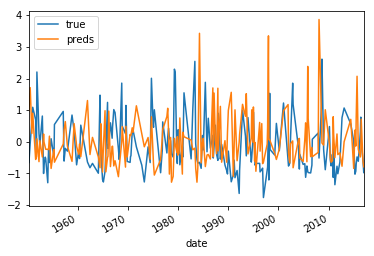

In [46]:
X = df[['AMO']]
y = df['flow_norm']
train_X, test_X, train_y, test_y = train_test_split(X, y)

r.fit(train_X, train_y)
preds = r.predict(test_X)
mean_squared_error(test_y, preds)

out = pd.DataFrame({'true':test_y,'preds':preds})
out.plot()

In [43]:
X = df[['AO']]
y = df['flow_norm']
train_X, test_X, train_y, test_y = train_test_split(X, y)

r.fit(train_X, train_y)
preds = r.predict(test_X)
mean_squared_error(test_y, preds)

1.4868871256558167

In [44]:
X = df[['NINO34']]
y = df['flow_norm']
train_X, test_X, train_y, test_y = train_test_split(X, y)

r.fit(train_X, train_y)
preds = r.predict(test_X)
mean_squared_error(test_y, preds)

1.5408059220199046

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
